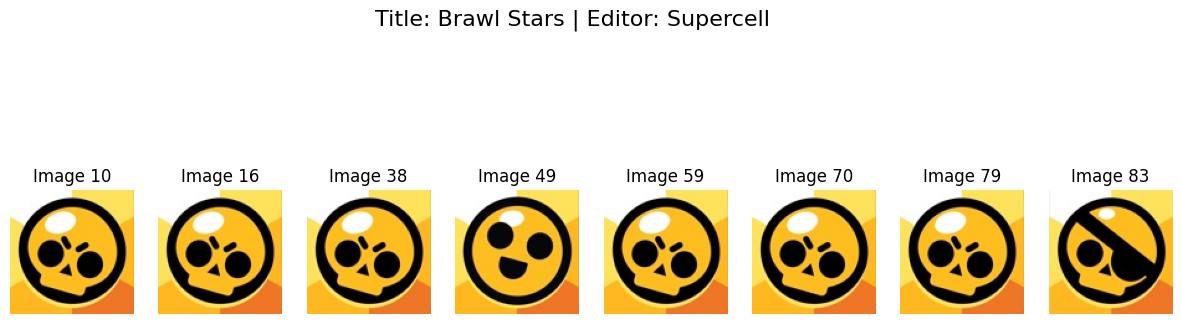

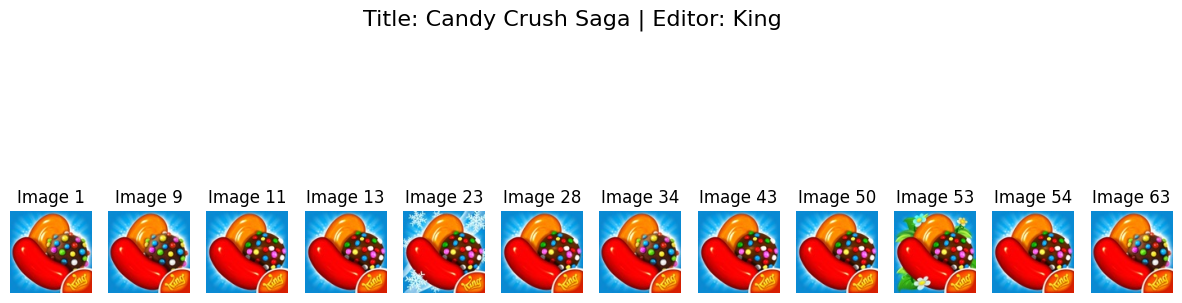

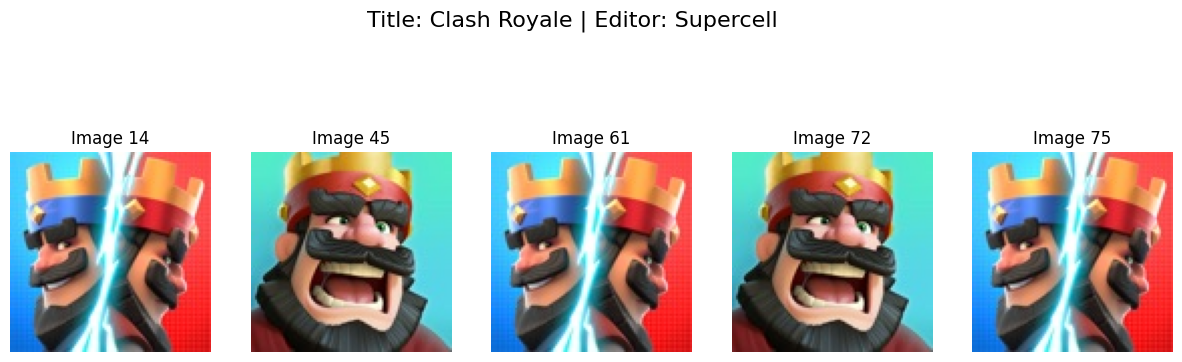

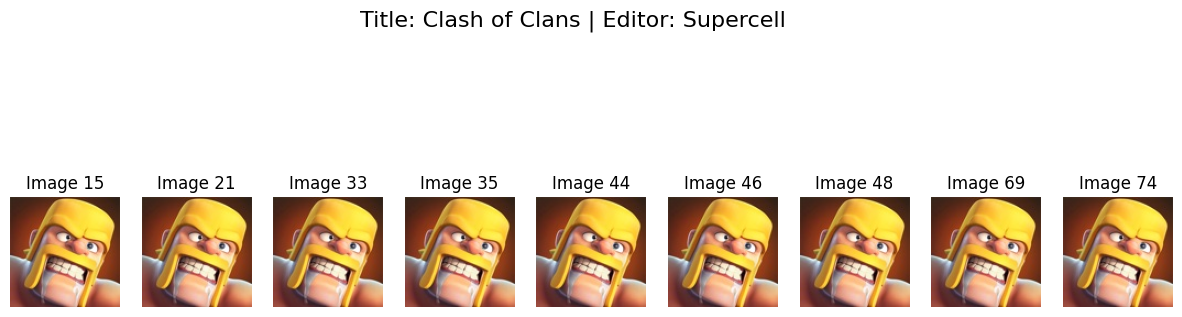

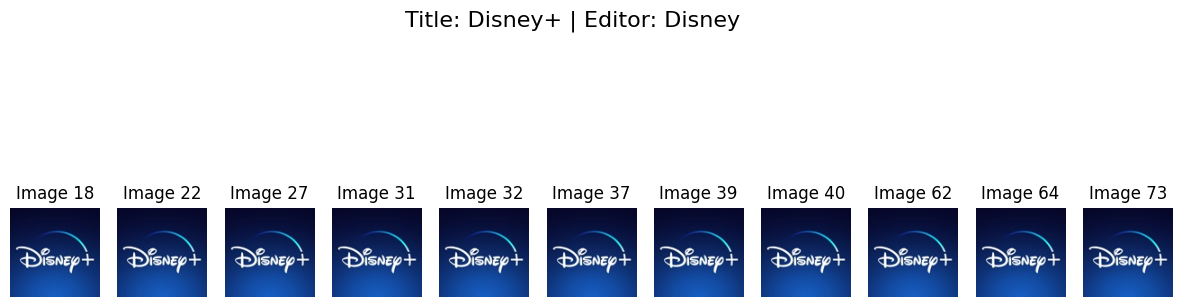

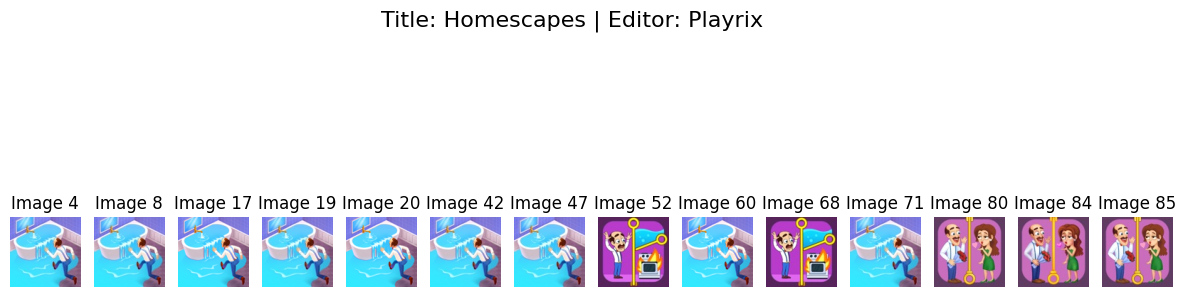

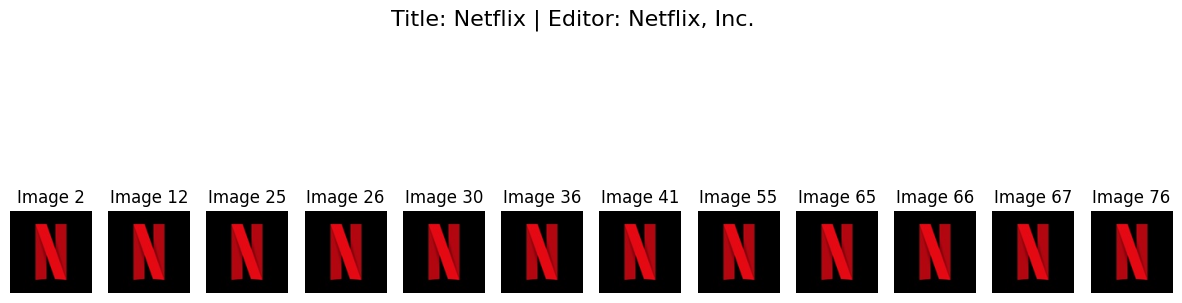

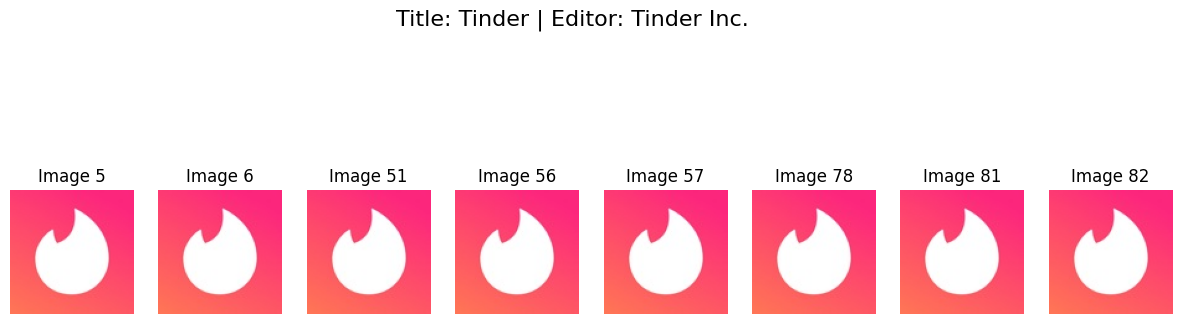

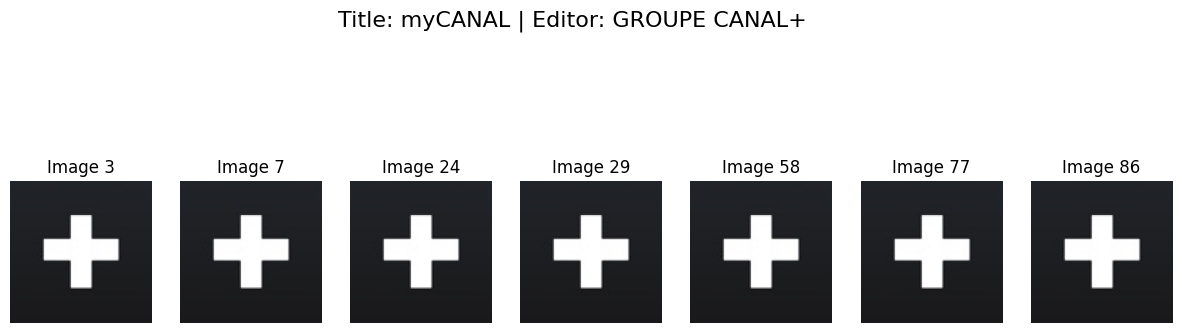

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# Load the CSV file
file_path = 'DNV Technical Test - Data Version/technical_test_external_source_extract.csv'
df = pd.read_csv(file_path)

# Function to download and return an image from a URL
def download_image(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content))

# Group the data by title and editor
grouped = df.groupby(['title', 'editor'])

# Plot images for each group
for (title, editor), group in grouped:
    fig, axes = plt.subplots(1, len(group), figsize=(15, 5))
    fig.suptitle(f'Title: {title} | Editor: {editor}', fontsize=16)
    
    for ax, (index, row) in zip(axes, group.iterrows()):
        img = download_image(row['icon'])
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'Image {index+1}')
    
    plt.show()
